In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
rcParams['figure.figsize'] = 12, 9

# Статистика

> __Статистика (statistic)__ - любая вычислимая функция из выборки данных $X = x_1, x_2, \ldots, x_n, \ldots, x_N$. При этом физики нередко могут называть статистикой параметризированные функции от выборки данных.

Примерами статистик могут быть:
* выборочный r-й момент
$$
m_r = \frac{1}{N} \sum_{n=1}^{N} x_n^r
$$
* выборочное среднее
$$
\bar{x} = \frac{1}{N} \sum_{n=1}^{N} x_n
$$
* Несмещенная выборочная дисперсия
$$
s^2 = \frac{\sum_{n=1}^{N} (x_n - \hat{x})^2}{N - 1}
$$
* $\chi^2$
* другие

[6.03606763 6.026184   4.75793896 4.75440725 6.45920305]
Mean =  4.9785443171010835
Sigma2 =  2.028606766803894


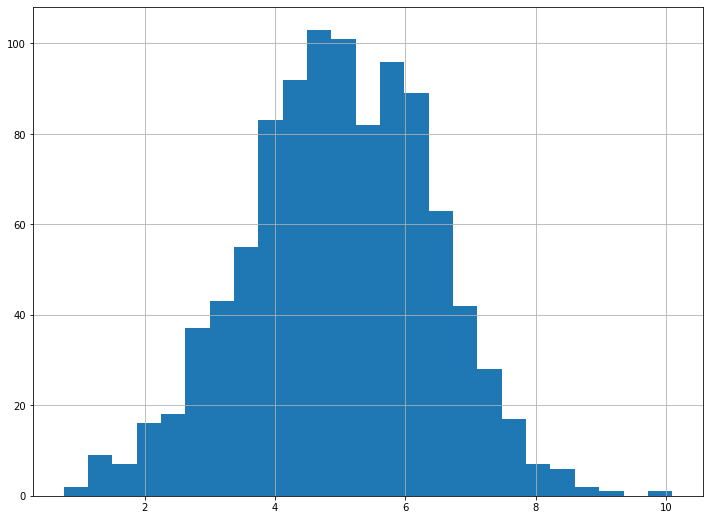

In [139]:
from scipy.stats import norm

mean = 5
sigma2 = 2

# Здесь второй параметр - это стандартное отклонение, а не дисперсия
pdf = norm(mean, np.sqrt(sigma2))

samples = pdf.rvs(size=1000)
print(samples[:5])
print("Mean = ", samples.mean())
print("Sigma2 = ", samples.var())

# Посмотрим на саму гистограмму случайной величины
plt.grid()
plt.hist(samples, bins=25);

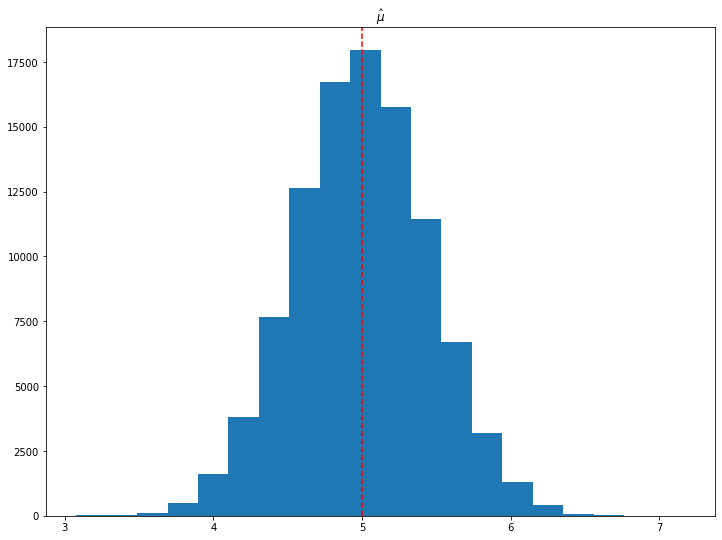

[4.66008804 5.41205152 5.08083878 5.35317092 4.42807583]
E[mu] = 5.000837160024142


In [140]:
# Попробуем посчитать выборочное среднее  множество раз

samples = pdf.rvs(size=(10, 100000))
means = samples.mean(axis=0)

plt.title("$\hat{\mu}$")
plt.axvline(mean, c='r', ls='--')
plt.hist(means, bins=20)

plt.show()

print(means[:5])
print("E[mu] =", means.mean())

Мы отчетливо видим, что выборочное среднее - это случайная величина, более того, мы можем даже предположить, что она распределена по нормальному закону.

> Почему?

## Оценка параметров распределений

На практике, вам в лучшем случае известно только семейство функций для распределения. Параметры же распредедения для вас будут не известны и их нужно как-то найти. 

Большинство стандартных распределений параметризированы 1 или 2 параметрами. На практике, придется работать с распределениями с достаточно большим числом параметров.

Чтобы оценить значения параметров, обычно вводят функцию оценки этих параметров, которая является функцией данных

$$
\hat{\vec{\theta}} = t(\mathbf{X})
$$

Результат данной функции также будет случайной величиной.

Способов построения данной функций довольно много, и у каждого есть свои преимущества и недостатки. К ним можно отнести метод максимального правдоподобия, методы машинного обучение и т.д.

## Правдоподобие

Обычно, мы можем представить один исход эксперимента, как набор случайных величин $\vec{x} = x_1, \ldots, x_K$. Здесь $\vec{x}$ - обозначает событие, которые описывается несколькими числовыми характеристиками (возможно взаимосвязанными), например: $p_T$ и заряд.

Распределение для $\vec{x}$ обычно учитывает множество эффектов: теорию, ошибку инструмента и прочее. Эти эффекты учитываются через параметры $\vec{\theta}$ этого распределения, которые изначально обычно неизвестны. Такую функцию плотности вероятности называют правдоподобием

$$
L(\vec{\theta}|\vec{x}) = P(\vec{x} | \vec{\theta}) = f(\vec{x} | \vec{\theta})
$$

Она показывает вероятность получения данного события $\vec{x}$ при заданных значениях параметров $\vec{\theta}$. 

Если наш эксперимент состоит из нескольких последовательных __независимых__ исходов $\mathbf{X} = \vec{x}_1, \ldots, \vec{x}_N$, распределенных по одному и тому же закону, то мы легко можем записать функцию правдоподобия для этой последовательности:

$$
L(\vec{\theta}|\mathbf{X}) =  \prod_n P(\vec{x}_n | \vec{\theta})
$$

То есть, фактически, функция правдоподобия показывает вероятность получить наши данные исходя из предположения, что эти данные получены из распределения $L(\vec{\theta}|\mathbf{X})$.

Часто удобно работать с логарифмом функции правдоподобия

$$
\mathcal{L}(\vec{\theta}|\mathbf{X}) = \ln L(\vec{\theta}|\vec{x}) = \sum_n \ln P(\vec{x}_n | \vec{\theta})
$$

## Байесов вывод

Функция правдоподобия идеально вписывается в теорему Байесса. В этом случае, мы считаем параметры распределения случайными величинами с некоторыми априорными вероятностями $P(\vec{\theta}) = \pi(\vec{\theta})$. Тогда сразу можем записать апостериорную вероятность для параметров

$$
P(\vec{\theta} | \mathbf{X}) = \frac{P(X|\theta)\pi(\theta)}{ P(X)} = \frac{ L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta}) }{
\int L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta}) \, d\vec{\theta}
}
$$

Если априорные вероятности параметров независимы, то $\pi(\vec{\theta}) = \pi_1(\theta_1)\cdot \ldots \cdot \pi_K(\theta_K)$. 

В априорную вероятноятность можно закладывать все, что мы знаем о значении данного параметра. Например, параметр может быть только больше нуля:

$$
\pi(\theta) = 
\left\{
\begin{align}
1,&\,\,\,\,\, \theta \ge 0
\\
0,&\,\,\,\,\, \theta < 0
\end{align}
\right.
$$

Так как знаменатель является константой и не зависит от параметров модели, его можно не писать, а в конце просто вывести из условия нормировки

$$
P(\vec{\theta} | \mathbf{X}) \sim L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta})
$$

Отлично, но как же нам искать значение параметров? У нас есть функция распределения для всех возможных значений параметров, а следовательно, мы можем найти наиболее вероятные значения параметров (это максимум апостериорной функции распределения) и даже построить доверительный интервал.


Интересной особенностью теоремы Байса можно отметить, что мы можем факторизовать априорную вероятность и правдоподобие. Как пример, если мы разобьем последовательность событий $\mathbf{X}$ на три группы $\mathbf{X}_1$, $\mathbf{X}_2$ и $\mathbf{X}_3$, то мы можем записать это как

$$
P(\vec{\theta}|\mathbf{X}) \propto L(\vec{\theta} | \mathbf{X} ) \pi(\vec{\theta})
\\ \Rightarrow \\
P(\vec{\theta}|\mathbf{X}) \propto L(\vec{\theta} | \mathbf{X_1} )  L(\vec{\theta} | \mathbf{X_2} )  L(\vec{\theta} | \mathbf{X_3} ) \pi(\vec{\theta})
$$

Мы можем расписать правдоподобие в произведение, предполагая независимость каждого события. Здесь если присмотреться, то можно заметить, что

$$
P(\vec{\theta}|\mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_1 ) \pi(\vec{\theta})
\\
P(\vec{\theta}|\mathbf{X}_2, \mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_2 ) P(\vec{\theta}|\mathbf{X}_1)
\\
P(\vec{\theta}|\mathbf{X}_3, \mathbf{X}_2, \mathbf{X}_1) \propto L(\vec{\theta} | \mathbf{X}_3 ) P(\vec{\theta}|\mathbf{X}_2, \mathbf{X}_1)
$$

Таким образом, добавляя новые измерения, мы меняем апостериорную информацию, исходя из полученного "опыта".

## Пример оценки по Байесу

Рассмотрим простой пример:
 > Пусть нас есть последовательность измерений $x_1, x_2, \ldots, x_N$, для которой мы предполгаем функцию правдоподобия в виде нормального закона с неизвестным $\mu$ и $\sigma^2$. Априорные вероятности $\pi_\mu(\mu) = const$ и $\pi_\sigma(\sigma^2) = const$.

Сразу же запишем функцию правдоподобия 

$$
L(\mu | \mathbf{X}) = \prod_n \mathcal{N}(x_n | \mu, \sigma^2)
$$

и затем апостериорную вероятность

$$
P(\mu | \mathbf{X}) \propto \prod_n \mathcal{N}(x_n | \mu, \sigma^2) \pi_\mu(\mu) \pi_\sigma(\sigma^2) \propto \prod_n \mathcal{N}(x_n | \mu, \sigma^2)
$$

Найдем самые вероятные значения. Для этого просто найдем производную и приравняем к нулю. Откуда

$$
\hat{\mu} = \frac{1}{N} \sum_n x_n
\\
\hat{\sigma}^2 = \frac{1}{N} \sum_n (x_n - \hat{\mu})^2 
= \frac{1}{N} \sum_n x_n^2 - \hat{\mu}^2
$$
что совпадает с выборочным средним и выборочной дисперсией.

Посмотрим теперь на более явный вид распределения по $\mu$ и $\sigma^2$

$$
P(\mu, \sigma^2 | \mathbf{X}) \propto \frac{1}{(2\pi\sigma^2)^{N/2}} \exp\left[
-N \frac{
    \hat{\sigma}^2 + (\mu - \hat{\mu})^2
}{
    2\sigma^2
}
\right]
$$

Тут видно, что если фиксировать $\sigma^2$, то $\mu \sim \mathcal{N}\left(\hat{\mu}, \frac{\sigma^2}{N}\right)$. Рассмотрим поведение $\mu$ в окрестности максимума апостериорной вероятности ($\mu = \hat{\mu}$ и $\sigma^2 = \hat{\sigma}^2$)

hat(mean) = 5.19864265959819
hat(sigma2) = 1.9921194135424065


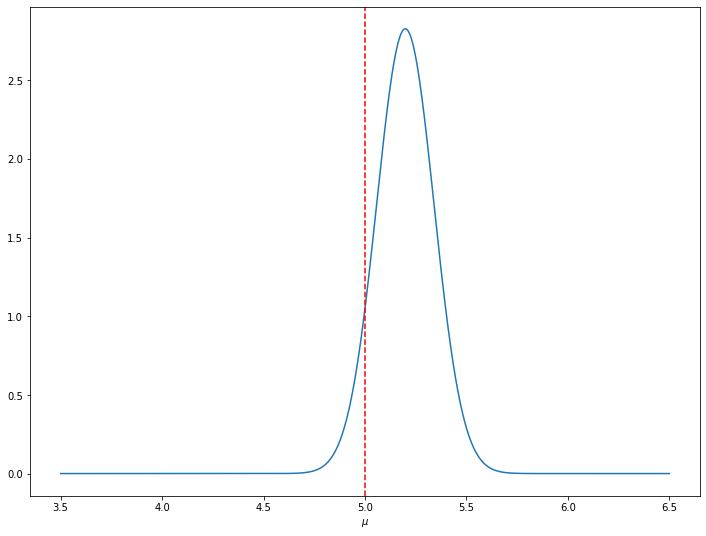

In [141]:
# Построим график распределения по mu
from scipy.stats import norm

N = 100
mean = 5
sigma2 = 2

samples = pdf.rvs(size=N)
h_mean = samples.mean()
h_sigma2 = samples.var()

h_mean_sigma2 = h_sigma2 / N
print("hat(mean) =", h_mean)
print("hat(sigma2) =", h_sigma2)

x = np.linspace(3.5, 6.5, 1000)
y = norm(h_mean, np.sqrt(h_mean_sigma2)).pdf(x)

plt.plot(x, y)
plt.xlabel("$\mu$")
plt.axvline(mean, ls='--', c='r')
plt.show()

## Доверительный интервал по Байесу

Апостериорное распределение для параметров распределения отражает нашу степень уверенности в каком-либо конкретном значении параметра при наличии у нас какого-то опыта или эксперимента. Из этого распределения мы можем построить интервал и указать вероятность попадания параметра в этот интервал.

$$
P(\theta_b \le \theta \le \theta_u) = \int_{\theta_b}^{\theta_u} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
$$

где $\alpha$ - уровень доверия, указывает на сколько сильно нам хотелось бы ошибаться. 

Такой интервал называют доверительным. В англоязычной литературе доверительный интервал по Байесу называют __credible interval__. 

Пусть $\alpha = 0.317$, что соответсвует вероятности в $1\sigma$ или 68.3%. Покажем как выглядит этот интервал

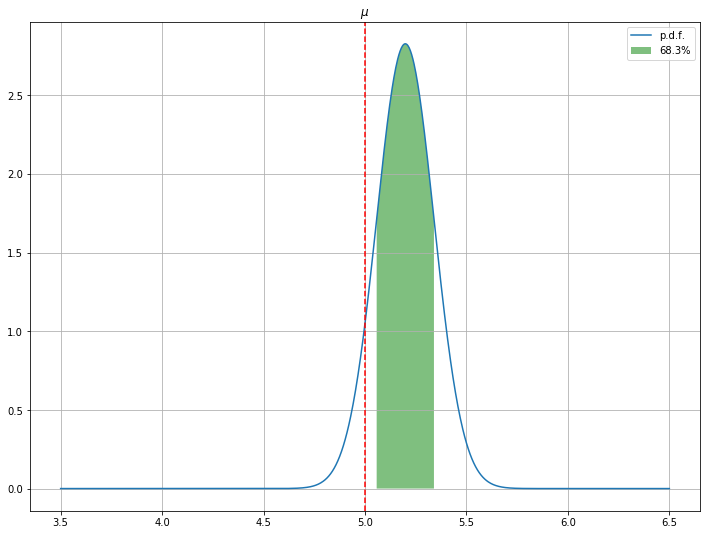

In [142]:
x1s = np.linspace(h_mean-np.sqrt(h_mean_sigma2), h_mean + np.sqrt(h_mean_sigma2), 1000)

plt.title("$\mu$")

plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([norm.pdf(x1s, h_mean, np.sqrt(h_mean_sigma2)), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="68.3%")

plt.plot(x, norm.pdf(x, h_mean, np.sqrt(h_mean_sigma2)), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()
plt.show()

Хм, тут мы должны задумать, ведь ничего не мешает выбрать другие пределы интегрирования.

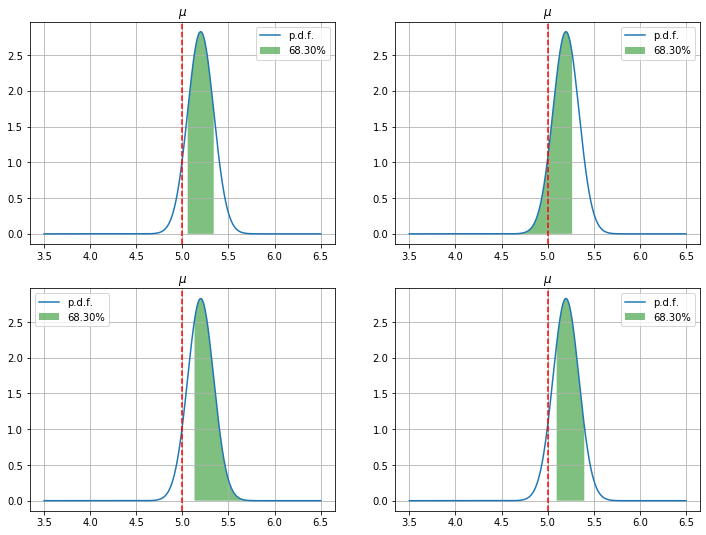

In [143]:
f = norm(h_mean, np.sqrt(h_mean_sigma2))
alpha = 0.317

plt.subplot(221)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(alpha/2), f.ppf(1-alpha/2), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()


plt.subplot(222)
plt.title("$\mu$")

x1s = np.linspace(x.min(), f.ppf(1 - alpha), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.subplot(223)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(alpha), x.max(), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.subplot(224)
plt.title("$\mu$")

x1s = np.linspace(f.ppf(3*alpha/4), f.ppf(1-alpha/4), 1000)
plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="%.2f%%" % ( (1-alpha) * 100))

plt.plot(x, f.pdf(x), label="p.d.f.")
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.legend()

plt.show()

Вероятность попадания в этот интервал везде одна и та же. Какой из них выбрать? Обычно выбирают такой интервал, чтобы вероятности внутри интервала были больше вероятностей вне интервала (обычно это соответствует наименьшей ширине интервала). Ниже представлены примеры наиболее часто используемые формы для доверительного интервала

$$
\int_{-\infty}^{\theta_u} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{\theta_l}^{\infty} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{\theta_0 - \delta}^{\theta_0 + \delta} P(\theta|\mathbf{X}) \, d\theta = 1 - \alpha
\\
\int_{-\infty}^{\theta_l} P(\theta|\mathbf{X}) \, d\theta = \frac{\alpha}{2}, \int_{\theta_u}^{\infty} P(\theta|\mathbf{X}) \, d\theta = \frac{\alpha}{2}
$$

Если $x$ распределен по нормальному закону (или симметричное распределение), то кратко доверительный интервал записывают как
$$x \pm \sigma_x,$$

Если интервал не симметричен
$$x_{-\delta_2}^{+\delta_1}$$


И еще раз: __доверительный интервал по Байесу показывает нашу степень в веры в то, что данный параметр принимает некое истинное значение в указанном интервале с определенной вероятностью. Формально, все значения внутри интервала подходят.__

Вид интервала зависит от выбора априорной функции распределения!

# Частотный вывод

В этом случае подход внешне остается тем же, но смысл, который в него вкладывается совершенно другой. В этом подходе считается, что параметры распределения фиксированы (не являются случайной величиной), мы их просто пока еще не знаем.

Таким образом, нам нужен метод, который позволяет найти оценку неизвестного параметра. Рассмотрим один из возможных методов.

## Метод максимального правдоподобия

На помощь приходит снова функция правдоподобия. Помним, что она показывает вероятность получения данных при конкретных значениях параметров.

Хорошо, что дальше? А дальше, мы ищем ее максимум, то есть максимизируем вероятность получения выборки (ищем наиболее правдоподобный вид функции)

$$
\hat{\vec{\theta}} = \arg\max_{\vec{\theta}} L(\vec{\theta}|\mathbf{X})
$$

Байесов вывод начинает совпадать с методом максимального правдоподобия, если априорную вероятность выбрать равномерной.

При этом, __считается, что область наблюдений $X$ не зависит от параметров $\vec{\theta}$!__

## Оценка параметров нормального распределения в частотном подходе

Рассмотрим в качестве примера нормальное распределение. Функция правдоподобия в этом случае примет вид

$$
L(\vec{\theta}|\mathbf{X}) = \prod_{n=1}^N f(x_n|\vec{\theta}) = \prod_{n=1}^N \mathcal{N}(x_n | \mu, \sigma^2)
$$

Здесь удобно перейти к логарифмической функции правдоподобия

$$
\mathcal{L}(\mu, \sigma^2|\mathbf{X}) = - \frac{N}{2} \ln (2\pi\sigma^2) - \sum_{n=1}^N \frac{(x_n - \mu)^2}{2\sigma^2}  
$$

Здесь уже можно увидеть, что мы получили метод наименьших квадратов (если считать $\sigma$ известной).

Максимум функции мы будет искать стандартно - найдем производные и приравняем к нулю:

$$
\frac{\partial \mathcal{L}}{\partial \mu} = \sum_{n=1}^{N} \frac{x_n - \mu}{\sigma^2} = 0
\\
\Rightarrow
\\
\hat{\mu} = \frac{1}{N} \sum_{n=1}^{N} x_n
$$

Мы получили формулу, совпадающую с выборочным средним.

Проделаем тоже самое для дисперсии:

$$
\frac{\partial \mathcal{L}}{\partial \sigma^2} 
= - \frac{N}{2 \sigma^2}  + \sum_{n=1}^{N} \frac{(x_n - \mu)^2}{2\sigma^4} 
= 0
\\
\Rightarrow
\\
\hat{\sigma}^2 = \frac{1}{N} \sum_{n=1}^{N} (x_n - \mu)^2
$$

Она зависит от $\mu$, которое мы уже нашли. Подставим нашу оценку $\hat{\mu}$

$$
\hat{\sigma}^2 
= \frac{1}{N} \sum_{n=1}^{N} (x_n - \hat{\mu})^2
= \frac{1}{N} \sum_{n=1}^{N} \left(x_n - \frac{1}{N} \sum_{i=1}^{N} x_i \right)^2
= \frac{1}{N} \sum_{n=1}^{N} x_n^2 - \hat{\mu}^2
$$

Пока все точно также, как и в Байесовом подходе в случае равномерного распределения.

In [144]:
# Проверим теперь эти утверждения

from scipy.stats import norm

mean = 5
sigma2 = 2
# Здесь второй параметр - это стандартное отклонение, а не дисперсия
f = norm(mean, np.sqrt(sigma2))

samples = f.rvs(size=1000)

print("hat(Mean) =", samples.mean())
print("hat(Variance) =", samples.var())

hat(Mean) = 5.062852404677271
hat(Variance) = 1.8992110660421648


Но как было показано ранее, эти величины зависят от наших данных, которые являются случайной величиной

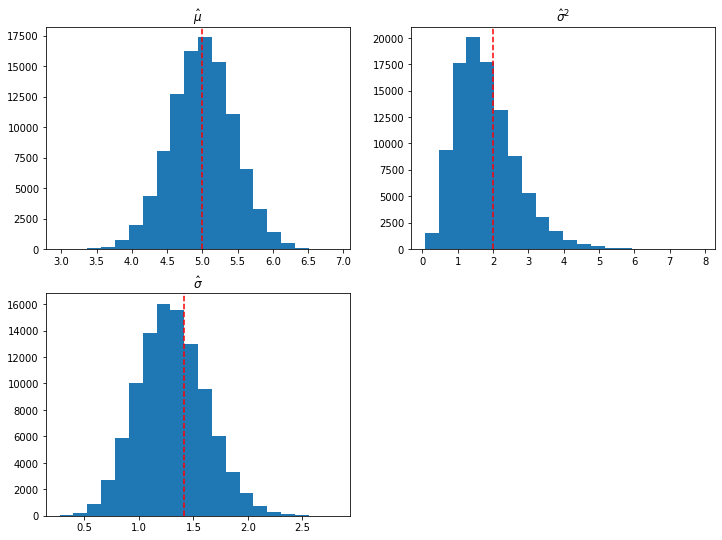

Mean[mu] = 5.00218492777637
Mean[sigma] = 1.3047345568926563
Mean[sigma2] = 1.7991311399432415


In [158]:
# Попробуем повторить это множество раз

samples = pdf.rvs(size=(10, 100000))
h_means = samples.mean(axis=0)
h_sigma2s = samples.var(axis=0)
    
plt.subplot(221)
plt.title("$\hat{\mu}$")
plt.axvline(mean, c='r', ls='--')
plt.hist(h_means, bins=20)

plt.subplot(222)
plt.title("$\hat{\sigma}^2$")
plt.axvline(sigma2, c='r', ls='--')
plt.hist(h_sigma2s, bins=20)

plt.subplot(223)
plt.title("$\hat{\sigma}$")
plt.axvline(np.sqrt(sigma2), c='r', ls='--')
plt.hist(np.sqrt(h_sigma2s), bins=20)

plt.show()

print("Mean[mu] =", np.mean(h_means))
print("Mean[sigma] =", np.mean(np.sqrt(h_sigma2s)))
print("Mean[sigma2] =", np.mean(h_sigma2s))

Здесь мы сразу же видим несколько особенностей оценок с помощью метода максимального правдоподобия: они являются случайной величиной и они могут быть смещены. Хорошая новость - эти оценки всегда состоятельны.

* __Смещение (bias)__ - среднее отклонение от истинного значения параметра
<br><br>
$$
b[\hat{\mu}] = E[\hat{\mu} - \mu] = E[\hat{\mu}] - \mu
$$
Оценка называется несмещенной если $b = 0$.

* __Состоятельность__ - если многократно повторять оценки на разных последовательностях исходов, то в среднем они будут сходится к одному конкретному числу.
<br><br>
$$
E[\hat{\mu}] = \hat{\mu}_0
$$

Раз это случайные величины, то по идее мы можем определить характеристики этих случайных величин.

### Выборочное среднее 

Тут мы видим, что каждый набор данных дает различное значение оценки $\mu$ и $\sigma^2$. В целом, видно, что $\hat{\mu}$ в среднем совпадает с реальным $\mu$

$$
E[\hat{\mu}] = \int \hat{\mu} L \, d\mathbf{X} 
= \mu
$$

Помним, что $L$ - это функция плотности вероятности и ничто нам не мешает искать среднее через нее. Легко увидеть правдивость этого утверждения, если вспомнить, что по определению $\mu = \int x \mathcal{N}(x|\mu, \sigma^2) \,dx$. Такую оценку параметра называют __несмещенной__.

Попробуем найти дисперсию мат. ожидания (среднего). Для этого введем следующую величину

$$
V = \frac{\partial \ln L(\mu, \sigma^2 | \mathbf{X})}{\partial \mu} = \frac{1}{L} \frac{\partial L}{\partial \mu}
$$

Среднее от этой величины очевидно, что 0. Помним, что правдоподобие - это функция плотности вероятности получить наши данные при заданных параметрах, а также, что интеграл от нее по всем возможным значениям дает 1.

$$
E[V] = \int V L(\mu, \theta | \mathbf{X}) d\mathbf{X} 
= \int \frac{1}{L} \frac{\partial L}{\partial \mu} L d\mathbf{X} 
= \frac{\partial}{\partial \mu} \int L d\mathbf{X} = 0
$$

Для полноты картины, осталось найти $D[V]$

$$
D[V] = E[V^2] - (E[V])^2 = \int \left(\frac{\partial \ln L}{\partial \mu} \right)^2 L \, d\mathbf{X}
=  - \int \left(
    \frac{\partial^2 \ln L}{\partial \mu^2} 
\right)^2 L \, d\mathbf{X} = \frac{N}{\sigma^2}
$$

Последнее выражение можно получить если продифференцировать по $\mu$ выражение для среднего V

$$
\int \frac{\partial^2 \ln L}{\partial \mu^2} L \, d\mathbf{X}
+
\int \left(\frac{\partial \ln L}{\partial \mu}\right)^2 L \, d\mathbf{X}
= 0
$$

> $D[V]$ называют [Информацией Фишера](https://ru.wikipedia.org/wiki/%D0%98%D0%BD%D1%84%D0%BE%D1%80%D0%BC%D0%B0%D1%86%D0%B8%D1%8F_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0) и обозначают $\mathcal{I}(\mu)$

Посчитаем теперь ковариацию между $\hat{\mu}$ и $V$

$$
Cov(\hat{\mu}, V) = E[ (\hat{\mu} - \mu) V ] =  E[\hat{\mu} V] = \int \hat{\mu} V L d\mathbf{X} 
= \int \hat{\mu} \frac{\partial L}{\partial \mu} \, d\mathbf{X} 
= \frac{\partial}{\partial \mu} \int \hat{\mu} L \, d\mathbf{X} 
= \frac{\partial}{\partial \mu} E[\hat{\mu}] = 1
$$

Здесь можно применить [Неравенство Коши-Буняковского](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B2%D0%B5%D0%BD%D1%81%D1%82%D0%B2%D0%BE_%D0%9A%D0%BE%D1%88%D0%B8_%E2%80%94_%D0%91%D1%83%D0%BD%D1%8F%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%BE%D0%B3%D0%BE), если заметить, что $Cov(X,X) = D[X]$

$$
|Cov(\hat{\mu}, V)| \le \sqrt{D[\hat{\mu}]D[V]}
\\
1 \le D[\hat{\mu}]D[V]
\\
D[\hat{\mu}] \ge \frac{1}{D[V]}
\\
D[\hat{\mu}] \ge \frac{\sigma^2}{N}
$$

Фактически мы получили [Неравенство Крамера-Рао](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D1%80%D0%B0%D0%B2%D0%B5%D0%BD%D1%81%D1%82%D0%B2%D0%BE_%D0%9A%D1%80%D0%B0%D0%BC%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%A0%D0%B0%D0%BE). Оно дает нижнюю границу ошибки оценки несмещенного параметра через информацию Фишера.

Интересно то, что Неравенство Коши-Буняковского превращается в равенство только в том случае, если V пропорционально $\mu$. В нашем случае так оно и есть ($V = \sum_{n=1}^{N} \frac{x_n - \mu}{\sigma^2} = \frac{N (\hat{\mu} - \mu)}{\sigma^2}$), следовательно мы получили точную формулу для определения дисперсии выборочного среднего

$$
D[\hat{\mu}] = \frac{\sigma^2}{N}
$$

Здесь мы видим, что чем больше наша выборка, тем меньше разброс при определении $\hat{\mu}$.

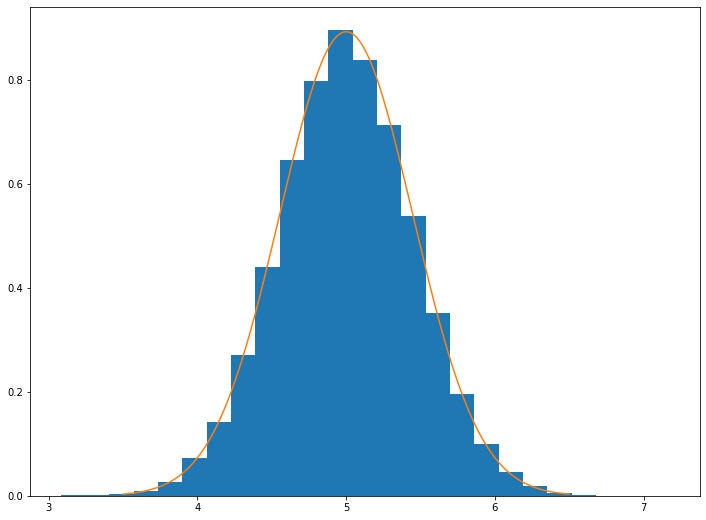

In [146]:
# Проверим, что наша формула верна

plt.hist(means, bins=25, density=True);
plt.plot(x, norm(mean, np.sqrt(sigma2/10)).pdf(x))
plt.show()

### Выборочная дисперсия

А вот с дисперсией происходит что-то странное: она ассимитрична и при этом в среднем не совпадает с реальным своим значением

$$
E[\hat{\sigma}^2]
= \int \hat{\sigma}^2 L \, d\mathbf{X} 
=
\\
= \int \left(\frac{1}{N} \sum_{n=1}^{N} x_n^2 - \hat{\mu}^2 \right) L \, d\mathbf{X}
=
\\
= \frac{1}{N} \sum_{n=1}^{N} E[x_n^2] - \frac{1}{N} \sum_{n=1}^{N} \mu^2 - (E[\hat{\mu}^2] - \mu^2) 
=
\\
= \frac{1}{N} \sum_{n=1}^{N} \left(E[x_n^2] - \mu^2\right) - D[\hat{\mu}] = \sigma^2 - \frac{\sigma^2}{N} 
$$

Здесь мы помним, что $\sigma^2 = \int (x - \mu)^2 \mathcal{N}(x | \mu, \sigma^2) dx$ и $d\mathbf{X} = dx_1 dx_2 \ldots dx_N$.

Таким образом, мы получили смещенную оценку, при чем смещение это $\frac{\sigma^2}{N}$. Вместо смещенной выборочной дисперии мы можем ввести несмещенную выборочную дисперию, учтя это смещение

$$
s^2 = \frac{N}{N-1} \hat{\sigma}^2 = \frac{1}{N-1} \sum_{n=1}^{N} (x_n - \hat{\mu})^2
$$

Теперь $E[s^2] = \sigma^2$. Образно, смещение вызвано тем, что мы для того, чтобы оценить значение дисперсии, сначала должны оценить значение другого параметра - среднее значение. Мы образно забрали одну "степень свободу" в наших данных. Поэтому там возникает -1.

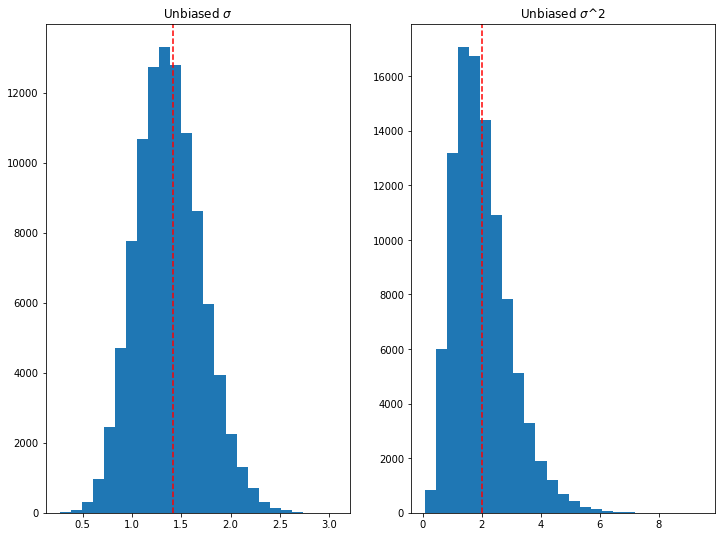

Mean[s] = 1.3769072490302139
Mean[s2] = 2.0048240117338363
Real sigma = 1.4142135623730951


In [152]:
s = h_sigma2s * 10 / (10 - 1)

plt.subplot(121)
plt.title("Unbiased $\sigma$")
plt.axvline(np.sqrt(sigma2), c='r', ls='--')
plt.hist(np.sqrt(s), bins=25)

plt.subplot(122)
plt.title("Unbiased $\sigma$^2")
plt.axvline(sigma2, c='r', ls='--')
plt.hist(s, bins=25)

plt.show()

print("Mean[s] =", np.mean(np.sqrt(s)))
print("Mean[s2] =", np.mean(s))
print("Real sigma =", np.sqrt(sigma2))

Тут можно обнаружить интересный факт - оценка $\hat{\sigma}^2$ стала значительно лучше, а вот $\hat{\sigma}$ - все еще смещена. Это вызвано тем, что мы компенсировали смещение именно для $\hat{\sigma}^2$, компенсация смещения для $\hat{\sigma}$ будет иметь совершенно другой вид.

## Замечания

Выше, мы проделали выкладки для нормального распределения, но эти же выкладки верны для любых распределений. Выборочное среднее всегда является несмещенной оценкой.

Неравенство Крамера-Рао в общем виде может учитывать смещение и указывает оценку снизу для дисперсии

$$
\sigma^2_{min} = \frac{\left(1 + \frac{\partial b}{\partial \theta}\right)^2 }{I(\theta)}
$$

## Доверительный интервал в частотном выводе

Доверительный интервал в частотном подходе записывается также, но несет в себе совершенно другой смысл. На английском языке этот интервал называют __confidence interval__.

Помним, что в этом подходе значения параметров фиксированы, просто они нам не известны. А это значит, что говорить о вероятности попадания значения данного параметра в фиксированный интервал не имеет смысла. Мы либо попали (тогда вероятность 100%), либо не попали (в этом случае 0%). 

То есть мы не можем говорить, что истинное значение параметра находится в этом интервале с какой-то вероятностью.

Что же тогда значит доверительный интервал в этом подходе?

На самом деле, доверительный интервал означает следующее:
> Если мы будем повторять эксперимент множество раз, и для каждого эксперимента мы будем строить свой доверительный интервал, то в $p$ процентах случаев этот интервал накроет истинное значение параметра. 

Таким образом, истинное значение параметра действительно остается константой (хоть и не известной нам), а вот границы интервала $\theta_l(\theta)$ и $\theta_u(\theta)$ становятся случайной величиной.

Попробуем в этом разобраться по шагам на примере нормального распределения. Мы уже знаем, что оценка среднего $\hat{\mu}$ распределена по нормальному закону $\mathcal{N}\left(\mu, \frac{\sigma^2}{N}\right)$.

Таким образом мы можем посчитать вероятность получения любого значения $\hat{\mu}$. Тут есть большая проблема, на практике, мы обычно никогда не знаем истинного значения параметров распределения. 

Что мы тут можем сделать? Можем посмотреть максимально допустимое отклонение от реального значения параметра, после которого вероятность увидеть какое-либо конкретное значение $\hat{\mu}$ становится меньше наперед заданного $\alpha$.

$$
P(\mu_l \le \hat{\mu} \le \mu_u) = 1 - \alpha
$$

И так, у нас есть

$$
P(\hat{\mu} | \mu) = \mathcal{N}\left(\hat{\mu} | \mu, \frac{\sigma^2}{N}\right)
$$

Будем считать, что $\sigma^2$ у нас задано. Тогда мы можем построить распределение для $\hat{\mu}$.

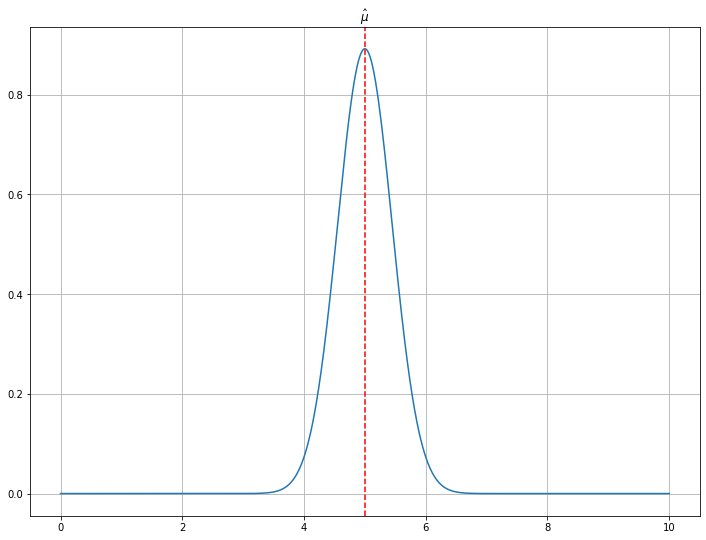

In [159]:
# напомним, как выглядит распределение для оценки среднего при каком-то заданном значении

x = np.linspace(0, 10, 1000)
plt.title("$\hat{\mu}$")
plt.plot(x, norm.pdf(x, 5, np.sqrt(2/10)))
plt.axvline(5, c='r', ls='--')
plt.grid()
plt.show()

Выберим какой-то уровень $\alpha$, пусть это будет 31.7% (то есть $1-\alpha$ = 68.3%). Это соответсвует отклонению в $1\sigma$. В данном контксте этот уровень будет определять нам область в распределение куда должен попасть $\hat{\mu}$ с заданной вероятностью:

$$
P( |\mu - \hat{\mu}| \le k_\alpha ) = 1 - \alpha
\\
P( |\mu - \hat{\mu}| > k_\alpha ) = \alpha
$$

Таким образом, $k_\alpha$ - определяет некую границу, максимальной допустимое отклонение для какого-то конкретного значения $\mu$.

На рисунке ниже зеленная область обозначает интервал, внутри которого мы будет с вероятностью $1-\alpha$ получать нашу оценку, то есть в области, где отклонение меньше $k_\alpha$.

Красная область - это область, где отклонение больше $k_\alpha$.

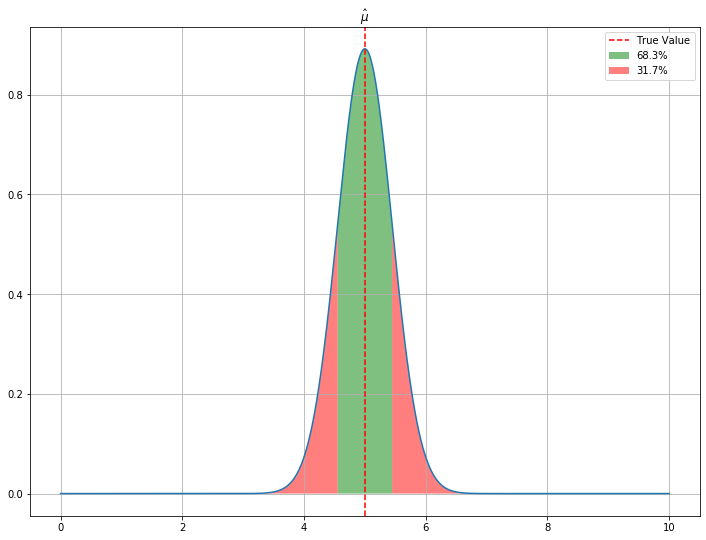

In [162]:
x1s = np.linspace(5-np.sqrt(2/10), 5+np.sqrt(2/10), 1000)
plt.title("$\hat{\mu}$")

x1l = np.linspace(x.min(), x1s.min(), 1000)
x1r = np.linspace(x1s.max(), x.max(), 1000)

plt.fill(np.concatenate([x1s, x1s[::-1]]),
         np.concatenate([norm.pdf(x1s, 5, np.sqrt(2/10)), np.zeros(x1s.shape)]),
         alpha=.5, fc='g', label="68.3%")

plt.fill(np.concatenate([x1l, x1l[::-1]]),
         np.concatenate([norm.pdf(x1l, 5, np.sqrt(2/10)), np.zeros(x1l.shape)]),
         alpha=.5, fc='r', label="31.7%")

plt.fill(np.concatenate([x1r, x1r[::-1]]),
         np.concatenate([norm.pdf(x1r, 5, np.sqrt(2/10)), np.zeros(x1r.shape)]),
         alpha=.5, fc='r')

plt.plot(x, norm.pdf(x, 5, np.sqrt(2/10)))
plt.axvline(5, c='r', ls='--', label="True Value")
plt.legend()
plt.grid()
plt.show()

И так, мы теперь можем сразу определить для любой оценки $\hat{\mu}$, в какую область (зеленую или красную) она попадает для любого значения $\mu$. 
Какой же смысл у эти областей? 

Сделаем предположение-гипотезу о том, что истинное значение $\mu$ принимает какое-то конкретное значение, то есть $\mu = \mu_0$. И в противовес этому выдвинем другую гипотезу $\mu \ne \mu_0$.

Теперь будем делать следующее, будем считать, что если $\hat{\mu}$ пападает в зеленную область, то оно получено из распределения с $\mu = \mu_0$ (наша первая гипотеза верная), Если попало в красную область - $\hat{\mu}$ получено из распределения с любым другим $\mu$ (вторая гипотеза верна). 

Допустим, мы получили большое значение $\hat{\mu}$ (оно попадает в красную область), следовательно - мы говорим, что вторая гипотеза верна. Но что если мы неправы и на самом деле первая гипотеза была верна? Мы будем ошибаться в худшем случае в $\alpha$ процентах случаев. Следовательно $\alpha$ определяет допустимый для нас уровень ошибки.

Теперь ничего нам не мешает определить все множество гипотез с $\mu$, для которых полученное значение $\hat{\mu}$ попадает в зеленую область. Предположим, что мы получили $\hat{\mu}_{obs} = 6$. Посмотрим, как ведут себя гипотезы по отношению к этому значению.

In [6]:
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.stats import norm

x = np.linspace(0, 10, 1000)

def Figure(mu=5, alpha=0.317):
    f = norm(mu, np.sqrt(2/10))
    x1s = np.linspace(f.ppf(alpha/2), f.ppf(1-alpha/2), 100)
    x1l = np.linspace(x.min(), f.ppf(alpha/2), 100)
    x1r = np.linspace(f.ppf(1-alpha/2), x.max(), 100)

    plt.fill(np.concatenate([x1s, x1s[::-1]]),
             np.concatenate([f.pdf(x1s), np.zeros(x1s.shape)]),
             alpha=.5, fc='g', label="%.2f%%" % (100 - 100*alpha))

    plt.fill(np.concatenate([x1l, x1l[::-1]]),
             np.concatenate([f.pdf(x1l), np.zeros(x1l.shape)]),
             alpha=.5, fc='r', label="%.2f%%" % (100*alpha))

    plt.fill(np.concatenate([x1r, x1r[::-1]]),
             np.concatenate([f.pdf(x1r), np.zeros(x1r.shape)]),
             alpha=.5, fc='r')

    plt.plot(x, f.pdf(x), 'b-')
    #plt.axvline(5, c='r', ls='--', label="True Value")
    plt.axvline(mu, c='m', ls='--', label="Hypothesis")
    plt.axvline(6, c='k', ls='--', label="$\hat{\mu}_{obs}$")
    plt.legend()
    plt.grid()
    plt.show()
    return

interactive_plot = interactive(Figure, mu=(x.min(), x.max(), 0.05), alpha=(0.05, 0.95, 0.05))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=5.0, description='mu', max=10.0, step=0.05), FloatSlider(value=0.317, …

Поэкспериментировав с гипотезами, можно увидеть, что мы допускам гипотезы от $\hat{\mu}_{obs} - \sigma_x$ и до $\hat{\mu}_{obs} + \sigma_x$. Этот интервал и формирует нам доверительный интервал вокруг нашей оценки.

Это предельное отклонение и формирует нам доверительный интервал вокруг нашей оценки, давай нам информацию о том, какие гипотезы мы не можем отвергнуть с заданным уровнем $\alpha$. 

В пределе, если мы будем строить множество таких интервало (а они случайная величина, как мы видим), то эти интервалы накроют истинное значение в $1-\alpha$ случаев.

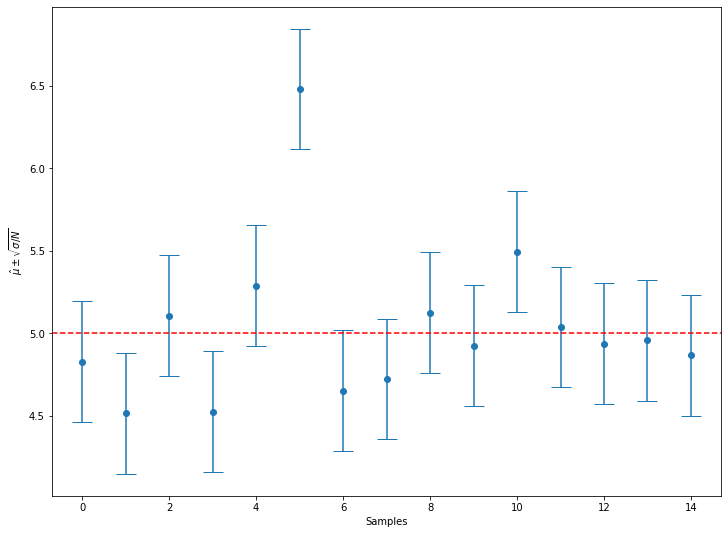

P = 0.68173


In [181]:
# Давайте посмотрим, как это выглядит

N = 15
y = h_means[:N]
n = [i for i in range(y.shape[0])]

plt.ylabel("$\hat{\mu} \pm \sqrt{\sigma/N}$")
plt.xlabel("Samples")
plt.errorbar(n, y, np.sqrt(sigma2/N), fmt="o", capsize=10)
plt.axhline(5, c="r", ls='--')
plt.show()

# Затем посчитаем вероятность того, что в этот интервал накроет истинное значение
counter = 0
for m in means:
    if (m - 5)**2 <= sigma2/10:
        counter += 1
        
print("P =", counter / means.shape[0])

В итоге, мы получили ожидаемоую вероятность покрытия интервалом истинного значения.

Но у нас все еще есть проблема, нам чтобы расчитать доверительный интервал нужно знать истинное значение параметра.

# Наглядные примеры

https://seeing-theory.brown.edu/frequentist-inference/index.html